In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [28]:
dtfruit = pd.read_excel('fruit.xlsx')
dtfruit

,diameter,weight,red,green,blue,name
0,2.96,86.76,172,85,2,orange
1,3.91,88.05,166,78,3,orange
2,4.42,95.17,156,81,2,orange
3,4.47,95.60,163,81,4,orange
4,4.48,95.76,161,72,9,orange
...,...,...,...,...,...,...
9995,15.35,253.89,149,77,20,grapefruit
9996,15.41,254.67,148,68,7,grapefruit
9997,15.59,256.50,168,82,20,grapefruit
9998,15.92,260.14,142,72,11,grapefruit


In [29]:
labels = dtfruit ['name'].unique()

In [30]:
print("Label atau kelas unik dalam dataset:")
print(labels)

Label atau kelas unik dalam dataset:
['orange' 'grapefruit']


In [31]:
dtfruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  10000 non-null  float64
 1   weight    10000 non-null  float64
 2   red       10000 non-null  int64  
 3   green     10000 non-null  int64  
 4   blue      10000 non-null  int64  
 5   name      10000 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


# Memisahkan fitur independent dan dependent

In [32]:
x = dtfruit.iloc [:, :-1].values # isi semua fitur independent
y = dtfruit.iloc [:, -1].values # isi target atau label

In [33]:
y

array(['orange', 'orange', 'orange', ..., 'grapefruit', 'grapefruit',
       'grapefruit'], dtype=object)

In [34]:
#mengonversi label yang berupa string menjadi numerik
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) # mengkonversi kelas ke nilai numerik

In [35]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [37]:
print("x_train = ", len(x_train))
print("x_test = ", len(x_test))
print("y_train = ", len(y_train))
print("y_test = ", len(y_test))
x_train

x_train =  8000
x_test =  2000
y_train =  8000
y_test =  2000


array([[ 11.37, 196.41, 147.  ,  79.  ,  21.  ],
       [ 12.78, 217.62, 148.  ,  81.  ,  20.  ],
       [  8.79, 157.32, 152.  ,  84.  ,   2.  ],
       ...,
       [  8.96, 160.2 , 147.  ,  66.  ,  13.  ],
       [ 13.77, 233.37, 154.  ,  78.  ,  21.  ],
       [  8.63, 154.63, 157.  ,  83.  ,   2.  ]])

# Menskalakan

In [38]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train) # menormalkan fitur agar skalanya sama
x_test = scaler.transform(x_test)

In [39]:
print("x_train",x_train)
print("x_test",x_test)

x_train [[0.64891975 0.63242589 0.43243243 0.56470588 0.42222222]
 [0.75771605 0.75475833 0.44594595 0.58823529 0.4       ]
 [0.44984568 0.40696735 0.5        0.62352941 0.        ]
 ...
 [0.46296296 0.42357827 0.43243243 0.41176471 0.24444444]
 [0.83410494 0.84559926 0.52702703 0.55294118 0.42222222]
 [0.4375     0.3914523  0.56756757 0.61176471 0.        ]]
x_test [[0.76929012 0.76646672 0.60810811 0.57647059 0.4       ]
 [0.33641975 0.28238551 0.24324324 0.68235294 0.        ]
 [0.4212963  0.37495674 0.63513514 0.52941176 0.42222222]
 ...
 [0.78626543 0.78578844 0.78378378 0.58823529 0.57777778]
 [0.4382716  0.39208675 0.64864865 0.48235294 0.        ]
 [0.61651235 0.59210982 0.47297297 0.22352941 0.15555556]]


# Modeling

In [40]:
perceptron = Perceptron(max_iter=100, tol=0.1, random_state=0)
perceptron.fit(x_train, y_train)

Perceptron(max_iter=100, tol=0.1)

In [41]:
# Menampilkan iterasi (epochs), bias, beban (weights), dan threshold
print(f"Jumlah iterasi (epochs): {perceptron.n_iter_}")
print(f"Bias (intercept): {perceptron.intercept_}")
print(f"Bobot (weights): {perceptron.coef_}")

Jumlah iterasi (epochs): 6
Bias (intercept): [5.]
Bobot (weights): [[-19.12654321   1.90367978   3.72972973   6.81176471  -3.28888889]]


# Prediksi hasil dan Evaluasi dari data uji

In [42]:
# Membuat prediksi pada data uji
y_pred = perceptron.predict(x_test)

# Menampilkan hasil prediksi
print("Prediksi untuk data uji:", y_pred)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Tingkat akurasi: {accuracy * 100:.2f}%")

Prediksi untuk data uji: [0 1 1 ... 0 1 0]
Tingkat akurasi: 91.65%


In [43]:
from sklearn.metrics import classification_report
akurasi = classification_report(y_test,y_pred)
print(akurasi)

              precision    recall  f1-score   support

           0       0.95      0.89      0.91      1012
           1       0.89      0.95      0.92       988

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



# Visualisasi sebaran data

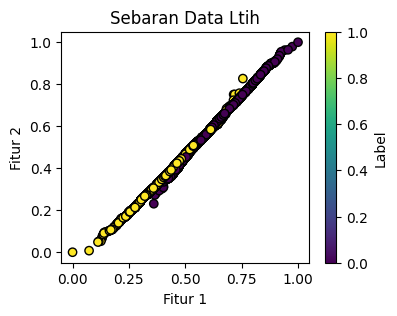

In [44]:
# Membuat scatter plot untuk melihat sebaran antara dua fitur pertama
plt.figure(figsize=(4, 3))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='viridis', edgecolors='k')
plt.title("Sebaran Data Ltih")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.colorbar(label='Label')
plt.show()



In [45]:
# Matriks kebingungan
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[897 115]
 [ 52 936]]


# Visualisasi

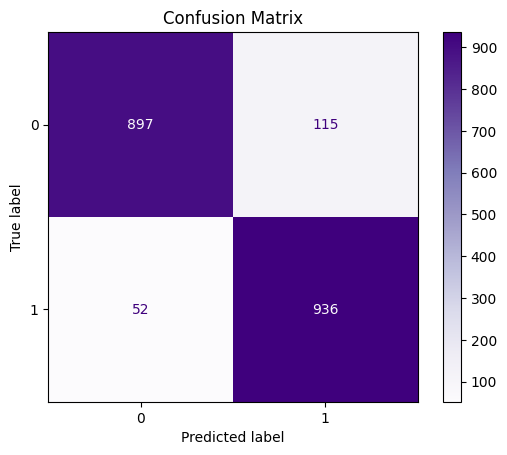

In [46]:
# Membuat plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Purples)  # Menggunakan colormap serupa
plt.title("Confusion Matrix")  # Menambahkan judul
plt.show()

# Membuat Data Baru

In [47]:
# Klasifikasi Data Baru
data_baru = np.array([[5.9, 76.89, 65, 78, 5]])  # Sesuaikan dengan fitur yang benar
data_baru_scaled = scaler.transform(data_baru)

# Lakukan prediksi dengan model yang telah dilatih
prediksi = perceptron.predict(data_baru_scaled)

# Hasil prediksi
print("Prediksi label:", label_encoder.inverse_transform(prediksi))  # Mengembalikan hasil prediksi ke bentuk asli


Prediksi label: ['orange']


In [48]:
import pickle
filename = 'scaler_perceptron.sav'
pickle.dump(scaler,open(filename,'wb'))

In [49]:
import pickle
filename = 'fruit_encoder.sav'
pickle.dump(label_encoder,open(filename,'wb'))

In [50]:
import pickle
filename = 'fruit_perceptron.sav'
pickle.dump(perceptron,open(filename,'wb'))